In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools as it
import matplotlib.cm as cm
import sys
import os
sys.path.append(os.path.abspath('./'))
from mds.visualizationtools import add_axis_cube

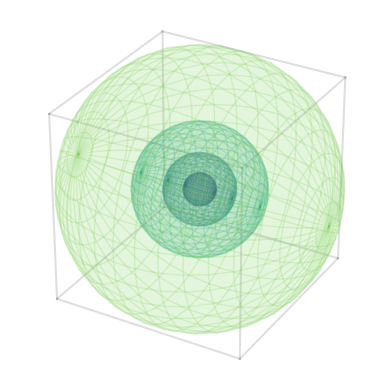

In [2]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d", "box_aspect": (1,1,1)})
r = 1
ϕ1s, ϕ2s, ϕ3s = np.mgrid[0:np.pi-0.7:5j, 0:np.pi:20j, 0:2*np.pi:40j]
wn = r*np.cos(ϕ1s)
xn = r*np.sin(ϕ1s)*np.cos(ϕ2s)
yn = r*np.sin(ϕ1s)*np.sin(ϕ2s)*np.cos(ϕ3s)
zn = r*np.sin(ϕ1s)*np.sin(ϕ2s)*np.sin(ϕ3s)
xn /= 1+wn
yn /= 1+wn
zn /= 1+wn
norm = plt.Normalize(0, xn.shape[0])
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_zlabel("$z$")
ax.set_xlim((-2,2))
ax.set_ylim((-2,2))
ax.set_zlim((-2,2))
ax.set_axis_off()
for idx in range(xn.shape[0]):
    colors = cm.viridis(np.ones(xn[idx].shape)*norm(idx))
    colors[:,:,3] = 0.1
    surf = ax.plot_surface(xn[idx], yn[idx], zn[idx],
                           facecolors=colors,
                           shade=False, linewidth=1)

add_axis_cube(ax, 4)

plt.savefig("s3-stereographic.png", bbox_inches='tight')
plt.show()